In [4]:
import tensorflow as tf
import pandas
dataset=pandas.read_csv('dataset.csv')
setx=dataset.values[:,0]
sety=dataset.values[:,1]

## Linear Regression ![op graph](imgs/3.jpg)

In [6]:
# Graph inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

# model weights
m = tf.Variable(tf.random_normal([1]), name="weight")
c = tf.Variable(tf.random_normal([1]), name="bias")

# a linear model
prediction = tf.add(tf.multiply(X, m), c)

# Mean squared error
cost = tf.reduce_sum(tf.pow(prediction-Y, 2))

# use an optimizer to update the variables.
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

In [7]:
# Start training
with tf.Session() as sess:
    sess.run(init_op)
    # Fit all training data
    for epoch in range(100):
        for (x, y) in zip(setx, sety):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        # Display summaries every 10 epochs
        if epoch % 10 ==0:
            err = sess.run(cost, feed_dict={X: setx, Y:sety})
            print "Epoch:", epoch, "cost=", "{:.9f}".format(err), "m=", sess.run(m), "c=", sess.run(c)
    trained_m=sess.run(m)
    trained_c=sess.run(c)
    print "Optimization Finished!"


Epoch: 0 cost= 1922.381103516 m= [0.6315935] c= [-0.46747127]
Epoch: 10 cost= 812.774353027 m= [0.77409995] c= [-0.3002135]
Epoch: 20 cost= 290.244689941 m= [0.8809296] c= [-0.17198358]
Epoch: 30 cost= 84.491546631 m= [0.95463246] c= [-0.08032013]
Epoch: 40 cost= 21.633344650 m= [0.9990251] c= [-0.0204734]
Epoch: 50 cost= 7.294787407 m= [1.0216925] c= [0.01646387]
Epoch: 60 cost= 4.840254784 m= [1.0312233] c= [0.04034487]
Epoch: 70 cost= 4.432671547 m= [1.0342956] c= [0.05874472]
Epoch: 80 cost= 4.260764599 m= [1.034761] c= [0.07602065]
Epoch: 90 cost= 4.096615314 m= [1.0343411] c= [0.09412882]
Optimization Finished!


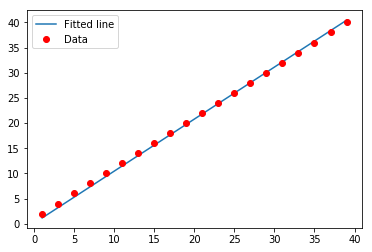

In [8]:
import matplotlib.pyplot as plt
plt.plot(setx, trained_m * setx + trained_c, label='Fitted line')
plt.plot(setx, sety, 'ro', label='Data')
plt.legend()
plt.show()

In [9]:
from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import layers
from tensorflow.contrib import keras

model = models.Sequential([layers.Dense(1, input_shape=(1,))])
# Use Adam optimizier and Mean Squared Error (MSE) as loss function
model.compile(optimizer=keras.optimizers.Adamax(0.1), loss='mse') 
print model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
traininglog=model.fit(setx, sety, epochs=100, batch_size=1,verbose=0)
traininglog.history['loss'][::10] # print every 10 epochs

[10.297786493628518,
 0.146512064820854,
 0.03492947090708185,
 0.005311858958339144,
 0.0006630804502492538,
 3.878759489452932e-05,
 1.1602592508097588e-06,
 1.6957626058911047e-08,
 1.0233236480416963e-10,
 0.0]

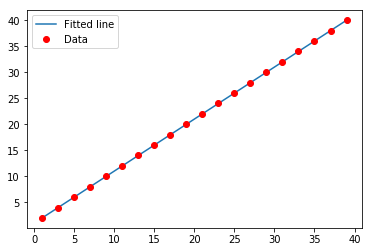

In [11]:
trained_m = model.get_weights()[0][0][0]
trained_c = model.get_weights()[1][0] 
import matplotlib.pyplot as plt
plt.plot(setx, trained_m * setx + trained_c, label='Fitted line')
plt.plot(setx, sety, 'ro', label='Data')
plt.legend()
plt.show()